In [1]:
import os
import trainer as tr
import matplotlib.pyplot as plt
import model.utils.utility as utils
from torch.utils.data import DataLoader
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# UNCOMMENT TO RUN THE FIRST BATCH OF EXPERIMENTS
# N_EPOCHS_SEGMENTATION = 10000
# BATCH_SIZE = 64
# TECHNIQUE = 'supervised'
# P_THRESHOLD = 0.5
# IoU_THRESHOLD = 0.65
# DATA_SPLIT = [0.2, 0.1, 0.7]
# CONF = 1

# UNCOMMENT TO RUN THE SECOND BATCH OF EXPERIMENTS
# N_EPOCHS_SEGMENTATION = 10000
# BATCH_SIZE = 64
# TECHNIQUE = 'supervised'
# P_THRESHOLD = 0.5
# IoU_THRESHOLD = 0.65
# DATA_SPLIT = [0.2, 0.1, 0.7]
# CONF = 2

# UNCOMMENT TO RUN THE THIRD BATCH OF EXPERIMENTS
N_EPOCHS_SEGMENTATION = 13000
BATCH_SIZE = 160
TECHNIQUE = 'supervised'
P_THRESHOLD = 0.5
IoU_THRESHOLD = 0.65
DATA_SPLIT = [0.6, 0.1, 0.3]
CONF = 3

In [2]:
trainer = tr.SupervisedTrainer(n_epochs_segmentation=N_EPOCHS_SEGMENTATION, technique=TECHNIQUE)
data, phase = tr.get_supervised_data(batch_size=BATCH_SIZE, split=DATA_SPLIT, conf=CONF)
if phase == 'train':
    trainer.train_segmentation(**data)

Loading Model...
Model Loaded Correctly


In [3]:
model = data['model']
test_data = tr.SegmentationDataset(mode='test', split_perc=DATA_SPLIT)
dataloader_test = DataLoader(test_data, batch_size=1, shuffle=True)
accuracy, accuracy_no_t, dice_score, sensitivity, specificity = trainer.evaluate(dataloader_test, model,
                                                                               p_threshold=0.5, T=0.65)

  0%|          | 0/1886 [00:00<?, ?it/s]C:\Users\Noisecape\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


KeyboardInterrupt: 

In [4]:
print(f'Thresholded_IoU {accuracy:.2f}')
print(f'IoU {accuracy_no_t:.2f}')
print(f'Dice Score {dice_score:.2f}')
print(f'Precision {sensitivity:.2f}')
print(f'Recall {specificity:.2f}')

Thresholded_IoU 0.52
IoU 0.66
Dice Score 0.76
Precision 0.86
Recall 0.94


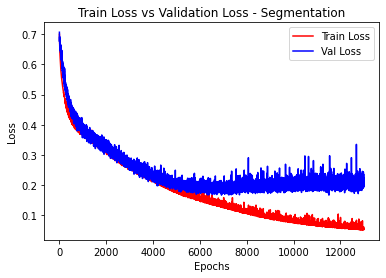

In [4]:
def plot_train_val_history(epoch, loss_history, val_history, title):
    plt.plot([el for el in range(epoch)], loss_history[:epoch], 'r', label='Train Loss')
    plt.plot([el for el in range(epoch)], val_history[:epoch], 'b', label='Val Loss')
    plt.title(f'Train Loss vs Validation Loss - {title}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

path_segmentation = './saved_models/segmentation_checkpoint_supervised.pth'
epoch_seg, loss_history_seg, val_history_seg = utils.get_train_history(path=path_segmentation)
plot_train_val_history(epoch_seg, loss_history_seg, val_history_seg, title='Segmentation')